In [1]:
from polygon_tally import *

Starting the import process.
Successfully Imported 'zernike_like'
Successfully Imported 'aggregate'


## Num Integration in ZBasis

- z_nm(self, x, y)
- num_zk_nm(self, mesh_size, function = base_input)

### hide 

In [5]:
# orthonormal over the same measure as k_nm!!!
dmu = z1._rho * z1._drho * z1._dphi / np.pi
cz = np.sum(dmu)
cz

1.0020030040050063

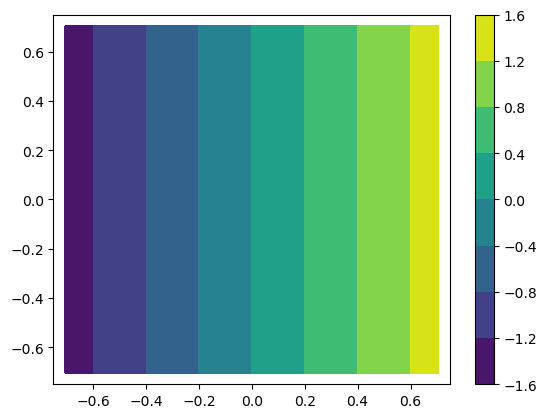

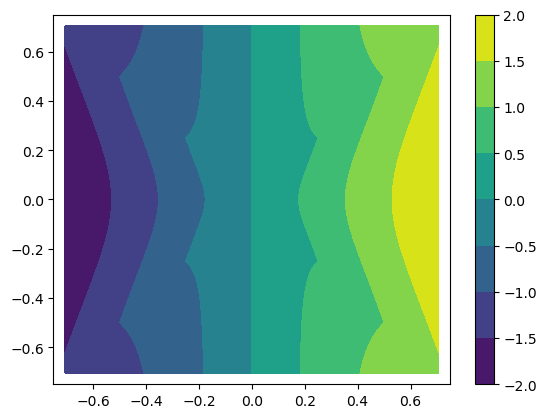

In [3]:
# testing a basis vector

# z basis
z1 = ZBasis(1,1,4,1)
z1._gen_all_cd(1000)

zx = z1._x
zy = z1._y
zf = z1.z_nm(zx, zy)

## plotting z
fig, ax = plt.subplots()
plot = ax.contourf(zx,zy,zf)
cbar = fig.colorbar(plot)
ax.set_ybound(-.75, .75)
ax.set_xbound(-.75, .75)
plt.show()

# k basis
k1 = KBasis(1,1,4,1)
k1._gen_all_cd(1000)

kx = k1._x
ky = k1._y
kf = k1.k_nm(kx, ky)

## plotting k
fig, ax = plt.subplots()
plot = ax.contourf(kx,ky,kf)
cbar = fig.colorbar(plot)
ax.set_ybound(-.75, .75)
ax.set_xbound(-.75, .75)
plt.show()

## Num Integration in KBasis

In [4]:
mesh_size = 1000
k1 = KBasis(1,-1,4,1)
k1._gen_all_cd(mesh_size)

In [8]:
ck_sci = k1.ana_ck_nm()
ck_num = k1.num_ck_nm(mesh_size)

ck_num, ck_sci

(2.0402207686905656, 2.036085933711458)

In [10]:
k1.ck

2.0402207686905656

- k_nm(x,y), so need to start with rho, phi and go to x,y

- start with rho, phi of mesh_size
- go to x,y
- find values of k_nm at each x,y
- use these values and integrate over the unit circle

### hide

In [11]:
dmu = k1._rho * k1._drho * k1._dphi / np.pi

f1 = base_input(k1._x, k1._y)
kv = k1.k_nm(k1._x, k1._y)

np.sum(dmu * f1 * kv), ck_sci

(2.0774497138918075, 2.036085933711458)

In [82]:
# coordinates not matching up grrrr 
rhok = k1._rho
rhophi = k1._phi

uk = rhok * np.cos(rhophi)
vk = rhok * np.sin(rhophi)

xk = k1._x
yk = k1._y

"""
fig, ax = plt.subplots()
ax.contourf(xk, yk, xk*0)
ax.set_xlim(-1.1,1.1)
ax.set_ylim(-1.1,1.1)
"""

np.sum(rhok - rho), np.sum(uk - u)

(0.0, 0.0)

In [5]:
# transform functions
def gen_rhophi(size):
    rho = np.linspace(0, 1, size)
    phi = np.linspace(0, 2 * np.pi, size)
    rho, phi = np.meshgrid(rho, phi)
    return rho, phi

def gen_uv(size):
    rho, phi = gen_rhophi(size)
    u = rho * np.cos(phi)
    v = rho * np.sin(phi)
    return u, v

def gen_rtheta(p, R0, size):
    """This one will just take self in the function, consider making the meshsize a parameter
    if there is no mesh_size, have it tell you that you need one
    you will want to use the same mesh_size for all of the numerical integration schemes
    """
    rho, phi = gen_rhophi(size)
    R = k1.variable_radius_theta(phi)
    r = rho * R
    return r, phi

def gen_xy(p, R0, size):
    r, theta = gen_rtheta(p, R0, size)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y

def pds_polygon(p, R0, size):
    r, theta = gen_rtheta(p, R0, size)
    dr = r[:,1]
    _, dr = np.meshgrid(dr, dr)
    dtheta = theta[1,1]
    return dr, dtheta

def pds_disk(size):
    rho, phi = gen_rhophi(size)
    drho = rho[:,1]
    _, drho = np.meshgrid(drho, drho)
    dphi = phi[1,1]
    return drho, dphi

In [7]:
# checking if the coordinates are the same
k1 = KBasis(0,0,4,1)
k1._gen_all_cd(mesh_size)

# rho,phi
rhok = k1._rho
phik = k1._phi
rho,phi = gen_rhophi(mesh_size)
print("rho,phi:", np.sum(rhok - rho), np.sum(phik - phi))

# u,v
uk = k1._u
vk = k1._v
u,v = gen_uv(mesh_size)
print("u,v:", np.sum(uk - u), np.sum(vk - v))

# r,theta
rk = k1._r
thetak = k1._theta
r,theta = gen_rtheta(4, 1, mesh_size)
print("r,theta:", np.sum(rk - r), np.sum(thetak - theta))

# x,y
xk = k1._x
yk = k1._y
x,y = gen_xy(4,1,mesh_size)
print("x,y:", np.sum(xk - x), np.sum(yk - y))

rho,phi: 0.0 0.0
u,v: 0.0 0.0
r,theta: 0.0 0.0
x,y: 0.0 0.0


In [84]:
p = 4
R0 = 1

# coords
rho, phi = gen_rhophi(mesh_size)
x,y = gen_xy(p, R0, mesh_size)

# differentials
drho, dphi = pds_disk(mesh_size)
dmu = rho * drho * dphi / np.pi

# functions
f = base_input(x,y)
k = k1.k_nm(x,y)

# integral
np.sum(dmu * f * k), ck_sci

(2.0774497138918075, 2.036085933711458)

In [33]:
# testing with hasattr
class Testing():
    def test(self):
        self.x = 1

a = Testing()

hasattr(a, "y")

False